In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import pickle

In [4]:
import os

def exp_name(exp):
    if exp[0] == exp[1]:
        return "{}, {} days".format(exp[0],exp[2])
    else:
        return "{}-of-{}, {} days".format(exp[0],exp[1],exp[2])

entropic_experiments_map = {'withoutMovie_entropic-10-10-3.pkl': [10,10,3]}

def load_files(exp_map):
    experiments = {}
    for filename in exp_map.keys():
    #     df = parse_results(filename, with_header=True)
        try:
            f = open('experiments/'+filename, "rb")
            results = pickle.load(f)
            f.close()
            print('Number of entries for {}: {}'.format(filename, len(results)))
            experiments[filename] = results
        except:
            print('parsing failed for {}'.format(filename))
            continue
    return experiments

experiments = load_files(experiment_map)

Number of entries for withoutMovie_entropic-10-10-3.pkl: 10


In [7]:
experiments

{'withoutMovie_entropic-10-10-3.pkl': [{'id': 1788701,
   'aux':          count  movieId  rating  days  avgMovieRating  nbReviews  \
   custId                                                             
   1788701     26     3124       4  2150        4.316803       4893   
   1788701     26    15124       5  2156        4.001480     216596   
   1788701     26     9224       5  2156        3.484842       9982   
   1788701     26    16242       4  2153        3.625298     178068   
   1788701     26    14367       3  2156        3.237659     154348   
   1788701     26     4522       4  2150        3.412799       5736   
   1788701     26     9617       4  2155        3.178050     100340   
   1788701     26    11283       5  2151        4.424362     181508   
   1788701     26    17169       3  2151        3.651411     145540   
   1788701     26    12470       3  2153        2.826910     177556   
   
            nbCustReviews  rnw  
   custId                       
   1788701      

In [5]:
a_priori_entropy = 18.9 # log2(N_CUSTOMERS)

statistics = {'nb_movies':[], 'days':[], 'entropy gain':[]}
for filename, results in experiments.items():
    print('experiment {}'.format(exp_name(entropic_experiments_map[filename])))
    entropy = sum([(r['entropy']) for r in results])/len(results)
    print(a_priori_entropy - entropy)
    l = entropic_experiments_map[filename]
    statistics['nb_movies'].append('{}-{}'.format(l[0],l[1]))
    statistics['days'].append(l[2])
    statistics['entropy gain'].append(a_priori_entropy - entropy)

experiment 10, 3 days
entropy    18.848168
dtype: float64


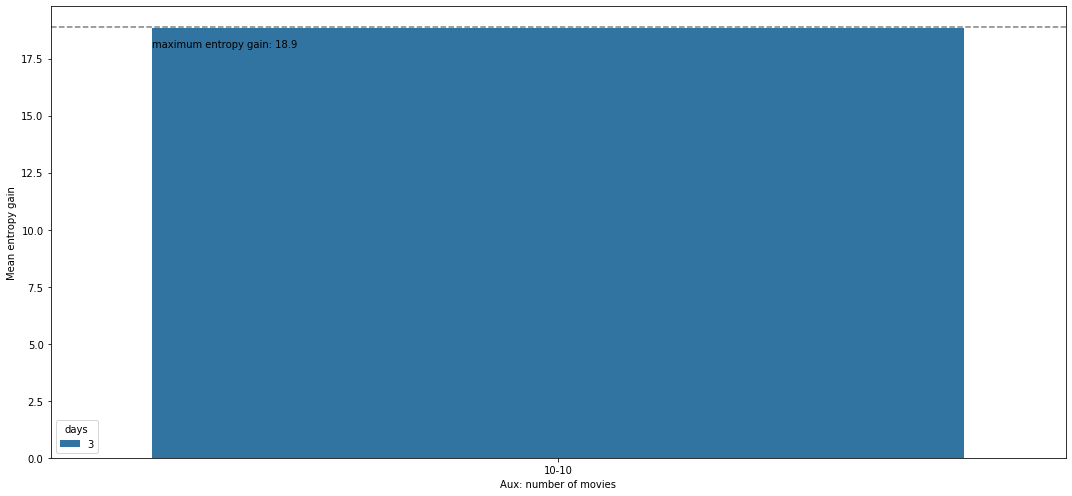

In [8]:
df = pd.DataFrame(statistics)#.set_index(['nb_movies', 'days']).unstack()
plt.figure(figsize=(15,7))
ax = sns.barplot(x='nb_movies', y='entropy gain', hue='days', data=df)
ax.set(xlabel='Aux: number of movies', ylabel='Mean entropy gain')
ax.axhline(18.9, linestyle="--", color="grey")
ax.text(-0.4,18,"maximum entropy gain: 18.9")
plt.tight_layout()
plt.savefig('withoutMovie_entropy.png')
plt.show()